In [23]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import lap ## might need to `!pip install lap`

Populating the interactive namespace from numpy and matplotlib


In [2]:
# !pip install lap

     |████████████████████████████████| 1.5 MB 9.3 MB/s 
  Created wheel for lap: filename=lap-0.4.0-cp37-cp37m-linux_x86_64.whl size=1590150 sha256=1736ac822ef703abe852acbd1ebaf9ee18fef57b7d0b52a6bb6657943849981e
  Stored in directory: /root/.cache/pip/wheels/b1/0b/e3/ef9daf1b5547b56389e42c80c3100f1e6479bf5fd00fd9d6ba
Successfully built lap


# Example: Secret Santa: Replacing the method of drawing names from a hat
This is an example of the assignment problem. This is something I did in graduate school, with embellishments to make the story more interesting. It seems relevant now in our current holiday season that might be virtual for many people.

In [7]:
names = ['Mom', 'Dad', 'Brother1', 'Brother2', 'Sister', 'Nephew', 'Uncle', 'Me']
##        0      1      2           3           4         5         6        7

## First version
Use random integers

In [8]:
matches = randint(0, 8, 8)
matches

for n in arange(8):
    print(names[n], 'buys for ', names[matches[n]])

Mom buys for  Dad
Dad buys for  Dad
Brother1 buys for  Dad
Brother2 buys for  Me
Sister buys for  Sister
Nephew buys for  Brother1
Uncle buys for  Brother1
Me buys for  Brother1


## Second version
Use a random permutation

In [11]:
matches = permutation(arange(8))

for n in arange(8):
    print(names[n], 'buys for ', names[matches[n]])

Mom buys for  Brother1
Dad buys for  Mom
Brother1 buys for  Brother2
Brother2 buys for  Nephew
Sister buys for  Uncle
Nephew buys for  Sister
Uncle buys for  Dad
Me buys for  Me


## Version 2.1
rejection sampling (cheap and dirty but often works): keep drawing random matches until one works

In [17]:
matches = permutation(arange(8))

while any(matches == arange(8)):
    matches = permutation(arange(8))

for n in arange(8):
    print(names[n], 'buys for ', names[matches[n]])

Mom buys for  Dad
Dad buys for  Nephew
Brother1 buys for  Mom
Brother2 buys for  Me
Sister buys for  Brother1
Nephew buys for  Uncle
Uncle buys for  Brother2
Me buys for  Sister


## Version 3.0
Version 2.1 worked well, but my mother tells me that she and my dad should not be assigned gifts to each other (since they buy gifts for each other anyway). The same for my sister and nephew. So this is getting complicated! I decided to rethink things and start over using linear assignment.

In [52]:
## random 'cost' for all assignments
C = rand(8, 8)

## eliminate posibility of self assignment by setting infinite cost
for j in arange(8):
    C[j, j] = inf



## eliminate posibility of assignments mom <-> dad
C[0, 1] = inf
C[1, 0] = inf

## eliminate posibility of assignments sister <-> nephew
C[4, 5] = inf
C[5, 4] = inf


# C[4, 7] = 0
# C[6, 2] = 0

print(around(C, 2))

_, matches, _ = lap.lapjv(C)


for n in arange(8):
    print(names[n], 'buys for ', names[matches[n]])

[[ inf  inf 0.45 0.64 0.39 0.82 0.8  0.96]
 [ inf  inf 0.55 0.27 0.84 0.74 0.45 0.42]
 [0.62 0.48  inf 0.78 0.98 0.54 0.02 0.57]
 [0.58 0.26 0.41  inf 0.7  0.02 0.14 0.62]
 [0.93 0.54 0.16 0.43  inf  inf 0.33 0.69]
 [0.15 0.1  0.3  0.65  inf  inf 0.15 0.15]
 [0.24 0.74 0.74 0.18 0.97 0.42  inf 0.64]
 [0.48 0.31 0.59 0.21 0.78 0.61 0.21  inf]]
Mom buys for  Sister
Dad buys for  Brother2
Brother1 buys for  Uncle
Brother2 buys for  Nephew
Sister buys for  Brother1
Nephew buys for  Me
Uncle buys for  Mom
Me buys for  Dad


In [26]:
?lap.lapjv

# Hungarian algorithm
## Method for solving the linear assignment problem
### Developed and published in 1955 by Harold Kuhn
Let $C\in \mathbb{R}^{n\times n}$ be the cost matrix (it must be square), where $c_{ij}$ is the cost of assigning row $i$ to column $j$. The minimum cost assignment of rows to columns can be computed as follows. Note the for maximization, we simply use the cost matrix $\hat{C} = -C$. 
### Steps:
  1. Subtract the smallest entry in each row from all the other entries in the row. This will make the smallest entry in the row now equal to 0.

  2. Subtract the smallest entry in each column from all the other entries in the column. This will make the smallest entry in the column now equal to 0.

  3. Draw lines through the row and columns that have the 0 entries such that the fewest lines possible are drawn.

  4. If there are nn lines drawn, an optimal assignment of zeros is possible and the algorithm is finished. If the number of lines is less than nn, then the optimal number of zeroes is not yet reached. Go to the next step.

  5. Find the smallest entry not covered by any line. Subtract this entry from each row that isn’t crossed out, and then add it to each column that is crossed out. Then, go back to Step 3.

### Computational cost
The Hungarian algorithm can be implemented (see Jonker and Volgenant 1987) in a form that requires $O(n^3)$ operations. (This is is what the `lapjv` function in the `lap` package uses.)


Jonker, R.; Volgenant, A. (December 1987). "A shortest augmenting path algorithm for dense and sparse linear assignment problems". Computing. 38 (4): 325–340. doi:10.1007/BF02278710.

# Example:
Consider the following cost matrix

$$
\begin{bmatrix}
82	&83	&69	&92 \\
77	&37	&49	&92 \\
11	&69	&5	&86 \\
8	&9	&98	&23 
\end{bmatrix}
$$

### Step 1: Subtract row minima

We start with subtracting the row minimum from each row. The smallest element in the first row is, for example, 69. Therefore, we substract 69 from each element in the first row. The resulting matrix is:

$$
\begin{bmatrix}
13	&14	&0	&23	\\
40	&0	&12	&55	\\
6	&64	&0	&81	\\
0	&1	&90	&15	
\end{bmatrix}
\begin{matrix}
(-69) \\
(-37) \\
(-5) \\
(-8) \\
\end{matrix}
$$

### Step 2: Subtract column minima

Similarly, we subtract the column minimum from each column, giving the following matrix:

$$
\begin{bmatrix}
13	&14	&0	&8 \\
40	&0	&12	&40 \\
6	&64	&0	&66 \\
0	&1	&90	&0 \\
\end{bmatrix}\\
\begin{matrix}
  &  &  & (-15)
\end{matrix}
$$

### Step 3: Cover all zeros with a minimum number of lines

We will now determine the minimum number of lines (horizontal or vertical) that are required to cover all zeros in the matrix. All zeros can be covered using 3 lines:

$$
\begin{bmatrix}
13	&14	&0	&8	\\
40	&0	&12	&40	\\
6	&64	&0	&66	\\
0	&1	&90	&0	
\end{bmatrix}
$$
(3rd column, 2nd and 4th row)

Because the number of lines required (3) is lower than the size of the matrix (n=4), we continue with Step 4.

### Step 4: Create additional zeros

First, we find that the smallest uncovered number is 6. We subtract this number from all uncovered elements and add it to all elements that are covered twice. This results in the following matrix:

$$
\begin{bmatrix}
7	&8	&0	&2 \\
40	&0	&18	&40 \\
0	&58	&0	&60 \\
0	&1	&96	&0
\end{bmatrix}
$$
Now we return to Step 3.

### Step 3: Cover all zeros with a minimum number of lines

Again, We determine the minimum number of lines required to cover all zeros in the matrix. Now there are 4 lines required:

$$
\begin{bmatrix}
7	&8	&0	&2	 \\
40	&0	&18	&40	 \\
0	&58	&0	&60	 \\
0	&1	&96	&0	 
\end{bmatrix}
$$
(all 4 rows)

Because the number of lines required (4) equals the size of the matrix (n=4), an optimal assignment exists among the zeros in the matrix. Therefore, the algorithm stops.

# Example
Find the best match between two sets of 2D positions

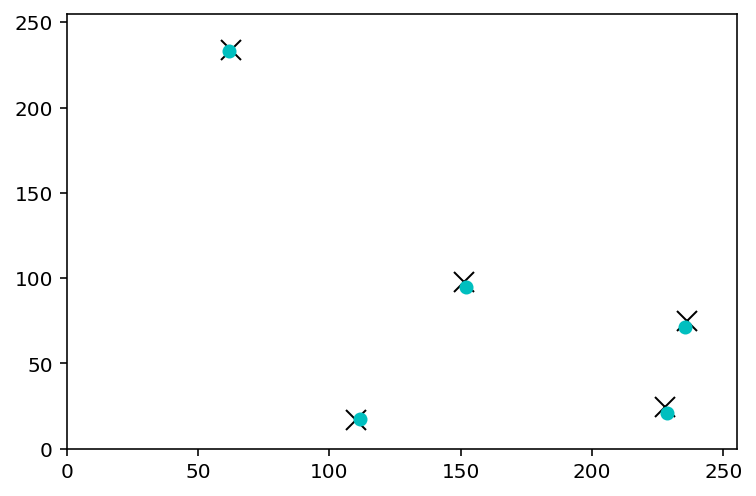

In [53]:
N = 5
Xtrue = 255*rand(N, 2)
X = Xtrue + normal(0, 3.2, (N, 2)) ## add a bit of random noise to our true positions

## shift positions if they are outside of the domain [0, 255]x[0, 255]
X[X<0] = - X[X<0]
X[X > 255] = 255 - (X[X > 255] - 255)

## plot the positions
plot(Xtrue[:, 0], Xtrue[:, 1], 'kx', ms=10)
plot(X[:, 0], X[:, 1], 'co')

xlim(0, 255)
ylim(0, 255);

In [ ]:
## sqrt((x1-x2)**2 + (y1-y1)**2)
DX = X[:, None, :] - Xtrue[None, :, :] ## use broadcasting to compute pairwise x_1 - x_2, y_1 - y_2
print(DX.shape)
C = sqrt( (DX**2).sum(axis=-1) ) ## sum over x component and y component
print(C.shape)
print(around(C, 3))

total_distance, matches, _ = lap.lapjv(C)
matches ## if the error in positions in X is small enough, we should get [0, 1, 2, ..., n-1]

(5, 5, 2)
(5, 5)
[[  4.291 106.824  80.006 105.131  98.651]
 [108.228   2.643  52.939 110.276 121.679]
 [ 88.741  53.516   6.591 140.71  146.134]
 [116.348 110.823 137.814  10.079  28.609]
 [ 93.304 122.058 135.341  25.038   8.899]]


array([0, 1, 2, 3, 4], dtype=int32)

## What happens if we have a different number of objects in each set?
The problem can be augmented to allow for the possibility of not assigning a row or column.
$$
\tilde{C} = 
\begin{bmatrix}
C_0 & D \\
B & 0 
\end{bmatrix}
$$
where $C_0\in \mathbb{R}^{m\times n}$, $D\in \mathbb{R}^{n\times n}$, and $B\in \mathbb{R}^{m\times m}$. The matrix $C_0$ represents the pairwise assignment cost for assigning source object $i$ to target object $j$. The off diagonal blocks are given by the matrices
$$D_{ij} = 
\begin{cases}
\delta_i, & i=j \\
\infty, & i\neq j
\end{cases},
\qquad
B_{ij} = 
\begin{cases}
\beta_i, & i=j \\
\infty, & i\neq j
\end{cases}.
$$
The cost of not assigning source object $i$ to any target object is $\delta_i$. Likewise, the cost of target object $j$ not getting assigned any source object is $\beta_j$.

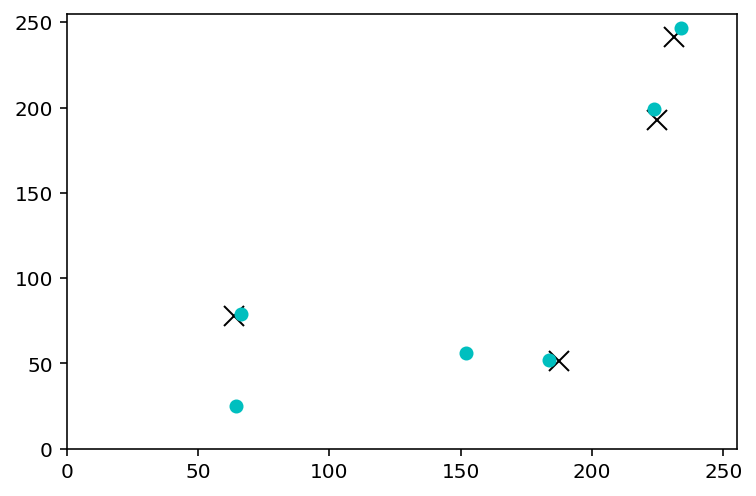

In [54]:
N = 6
Xtrue = 255*rand(N, 2)
X = Xtrue + normal(0, 3.2, (N, 2))
Xtrue = Xtrue[:N-2]

X[X<0] = - X[X<0]
X[X > 255] = 255 - (X[X > 255] - 255)


plot(Xtrue[:, 0], Xtrue[:, 1], 'kx', ms=10)
plot(X[:, 0], X[:, 1], 'co')

xlim(0, 255)
ylim(0, 255);

In [55]:
DX = X[:, None, :] - Xtrue[None, :, :]
print(DX.shape)
C0 = sqrt( (DX**2).sum(axis=-1) )
m, n = C0.shape
print('m =', m, ', n =', n)
print('')
delta = 3.*ones(m)
beta = 3.*ones(n)


C = zeros((n + m, n + m))
C[:m, :n] = C0
C[:m, n:] = inf
C[m:, :n] = inf
for i in arange(n):
    C[m+i, i] = beta[i]
for i in arange(m):
    C[i, n+i] = delta[i]
    

print(around(C, 2))

total_distance, matches, _ = lap.lapjv(C)
_ma = matches[:m]
is_matched = _ma < n # indicator (True/False) for the source objects that were matched
matched_source_objects = arange(m)[is_matched] # row index for source objects that got matched
print(matched_source_objects)
matched_target_objects = _ma[is_matched] # column index for target objects that were assigned
print(matched_target_objects)

(6, 4, 2)
m = 6 , n = 4

[[  6.78  43.06 152.01 200.61   3.      inf    inf    inf    inf    inf]
 [ 54.75   5.57 200.38 239.45    inf   3.      inf    inf    inf    inf]
 [146.64 195.72   3.9  122.62    inf    inf   3.      inf    inf    inf]
 [194.89 231.61 124.35   2.67    inf    inf    inf   3.      inf    inf]
 [232.03 273.57 126.1   53.04    inf    inf    inf    inf   3.      inf]
 [154.81 201.96  35.61  91.07    inf    inf    inf    inf    inf   3.  ]
 [  3.      inf    inf    inf   0.     0.     0.     0.     0.     0.  ]
 [   inf   3.      inf    inf   0.     0.     0.     0.     0.     0.  ]
 [   inf    inf   3.      inf   0.     0.     0.     0.     0.     0.  ]
 [   inf    inf    inf   3.     0.     0.     0.     0.     0.     0.  ]]
[1 2 3]
[1 2 3]


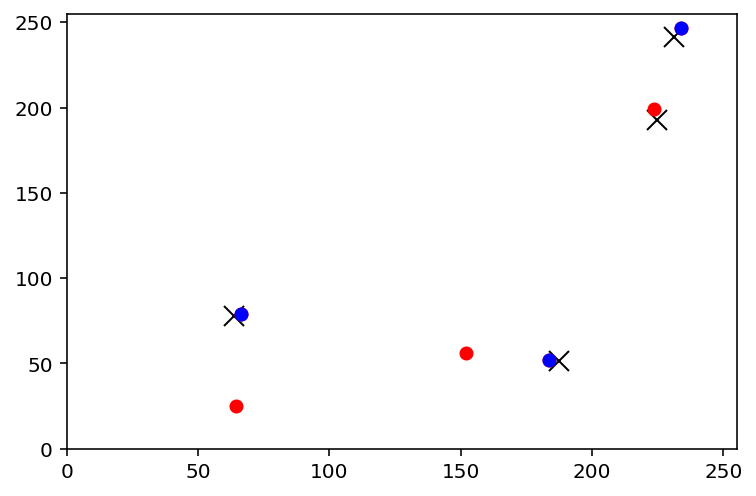

In [56]:
plot(Xtrue[:, 0], Xtrue[:, 1], 'kx', ms=10)
plot(X[:, 0], X[:, 1], 'ro')
plot(X[matched_source_objects, 0], X[matched_source_objects, 1], 'bo')

xlim(0, 255)
ylim(0, 255);